# Стратегия взаимодействия с клиентами сети фитнес-центров «Культурист-датасаентист»

## Изучение данных и подготовка к анализу

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
df = pd.read_csv('/datasets/gym_churn.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [4]:
df.columns = map(str.lower, df.columns)

In [5]:
df.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


### Вывод

В данных нет пропущенных значений. Для удобства названия признаков (столбцов датасета) были приведены к нижнему регистру.

## Исследовательский анализ данных (EDA)

In [6]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался:

In [7]:
df.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


В группе тех, кто остаётся средние значения всех признаков больше, чем у тех, кто ушел в отток. Особенно видна разница у следующих признаков:
- contract_period (длительность текущего действующего абонемента )
- month_to_end_contract (срок до окончания текущего действующего абонемента)
- lifetime (время с момента первого обращения в фитнес-центр )

Построим распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток):

In [8]:
df_1 = df.query('churn == 0')
df_2 = df.query('churn == 1')

In [9]:
X_1= df.drop('churn', axis = 1)

In [10]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {return false;}

<IPython.core.display.Javascript object>

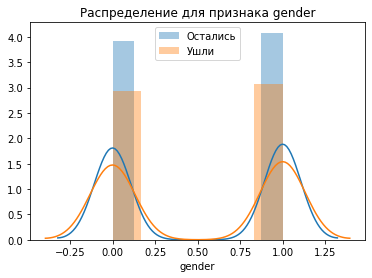

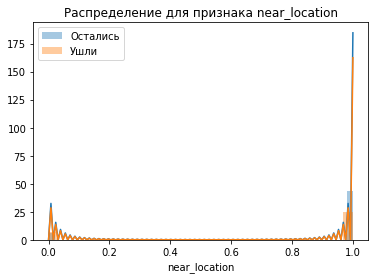

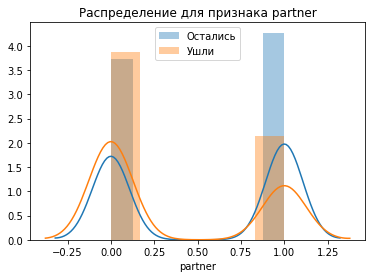

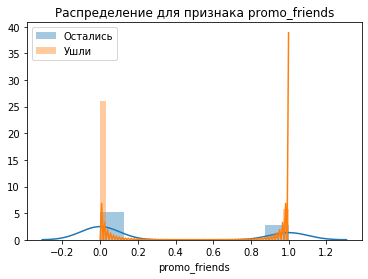

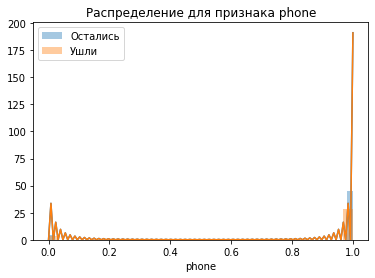

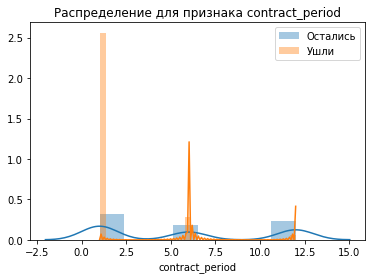

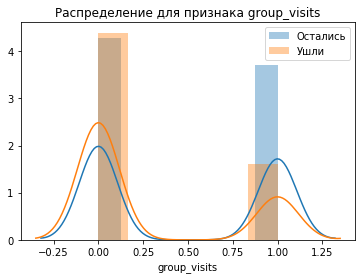

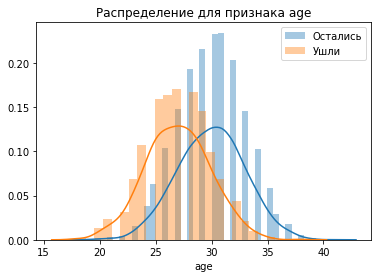

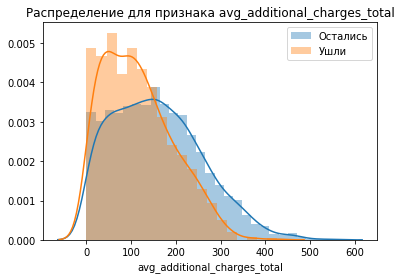

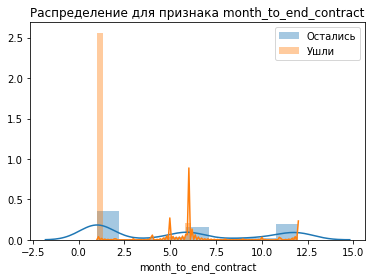

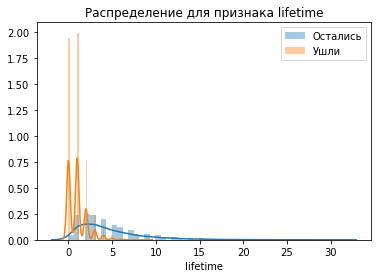

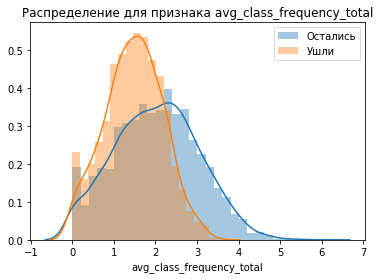

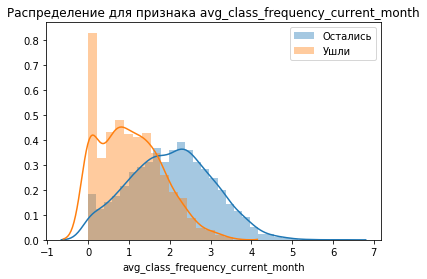

In [11]:
for feature in X_1:
    sns.distplot(df_1[feature])
    sns.distplot(df_2[feature])
    plt.legend(labels = ('Остались', 'Ушли'))
    plt.title('Распределение для признака ' + feature)
    plt.show()

- остаются люди более старшего возраста, в основном 30ти летние, а уходят 25 летние
- те кто уходят в основном посещади 1-2 раза в неделю, а те кто остаются 2-3
- те кто уходят в последний перед уходом месяц начинают ходять реже, 0-1 раз в неделю
- уходят в основном новенькие, они с клубом не более 2,5 месяцев
- уходят в основном те, кто покупал абонемент на 1 месяц
- уходят в основном те, у кого остаётся один месяц до конца абонемента
- те кто уходит тратит на доп услуги меньше тех, кто остаётся

Построим матрицу корреляций:

In [12]:
cm = df.corr() 

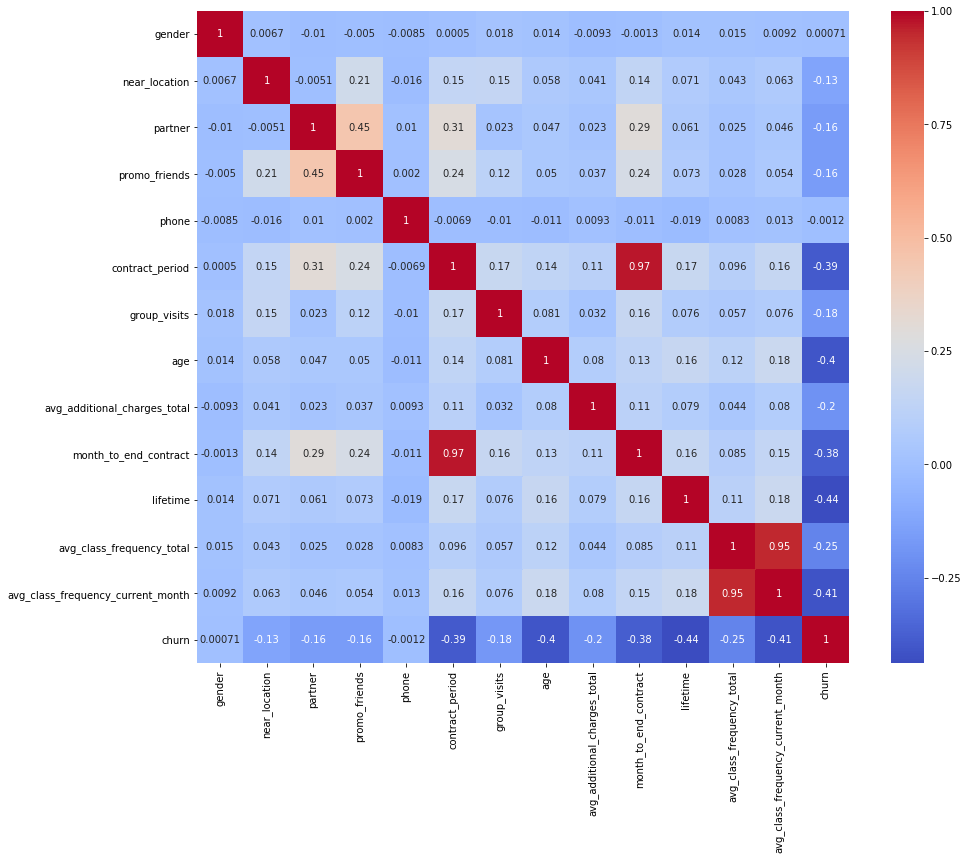

In [13]:
plt.figure(figsize=(15,12))
sns.heatmap(cm, annot = True, square=True, cmap="coolwarm")
plt.show()

- сильная взаимосвязь (кореляция 0,97) между contract_period и month_to_end_contract
(длительность текущего действующего абонемента и срок до окончания текущего действующего абонемента)
- сильная взаимосвязь (кореляция 0,95) между avg_class_frequency_total и avg_class_frequency_current_month (ср. частота посещений в неделю за все время с начала действия абонемента и ср. частота посещений в неделю за предыдущий месяц)
- есть взаимосвязь (кореляция 0,45) между partner и promo_friends (сотрудник компании-партнёра клуба и факт первоначальной записи в рамках акции «приведи друга»)
- есть обратная (не слишком сильная) взаимосвязь между churn и lifetime (-0,44), churn и age (-0,4), churn и avg_class_frequency_current_month (-0,41), churn и contract_period (-0,39), churn и month_to_end_contract (-0,38) (фактом оттока и временем с момента первого обращения, фактом оттока и возрастом клиента, фактом оттока и средней частотой посещений в неделю за предыдущий месяц, фактом оттока и длительностью текущего действующего абонемента, фактом оттока и  сроком до окончания текущего действующего абонемента)

### Вывод

Похоже, что реже уходят более постоянные клиенты (они раньше начали посещать клуб), клиенты, которые чаще его посещают и у которых не совсем скоро заканчивается абонемент. Взаимосвязь между фактом первоначальной записи по акции "приведи друга" и фактом, что клиент является сотрудником компании партнёра клуба может говорить о том, что акциия хорошо работает среди работающих в одной компании людей. Так же есть интересная взаимосвяль между фактом оттока и возратом клиента.

## Модель прогнозирования оттока клиентов

Посмотрим, как соотносятся классы для нашего набора данных

In [14]:
df['churn'].value_counts()

0    2939
1    1061
Name: churn, dtype: int64

Классы несбалансированны, поэтому при проверке качества модели будем смотреть ещё на метрику AUC-ROC — тк она хорошо подходит даже для несбалансированных классов. Определим функцию, которая будет выводить метрики.

In [15]:
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

Разделим данные на признаки и целевую переменную:

In [16]:
X = df.drop('churn', axis = 1)
y = df['churn']

Разделим данные на обучающую и валидационную выборку:

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Стандартизируем данные на валидационной выборке:

In [18]:
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)

In [19]:
X_test_st = scaler.transform(X_test)

### Логистическая регрессия

In [67]:
lr_model = LogisticRegression(solver='liblinear', random_state=0) 

Обучим нашу модель:

In [68]:
lr_model.fit(X_train_st, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Воспользуемся уже обученной моделью, чтобы сделать прогнозы:

In [69]:
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:, 1]

In [70]:
print_all_metrics(
    y_test,
    lr_predictions,
    lr_probabilities,
    title='Метрики для модели логистической регрессии:',
)

Метрики для модели логистической регрессии:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83
	F1: 0.84
	ROC_AUC: 0.97


Все метрики высокие, но мы знаем, что accuracy работает не всегда, а только при условии баланса классов — когда объектов каждого класса примерно поровну. Попробуем рассчитать вектор финальных прогнозов с учётом порога 0,4 и сравним с метриками, полученными при автоматическом расчёте классов.

In [71]:
threshold = 0.4

In [72]:
lr_custom_predictions = [0 if i < threshold else 1 for i in lr_probabilities]

In [73]:
print_all_metrics(
    y_test,
    lr_custom_predictions,
    lr_probabilities,
    title='Метрики для прогноза с кастомным порогом:',
)

Метрики для прогноза с кастомным порогом:
	Accuracy: 0.92
	Precision: 0.82
	Recall: 0.86
	F1: 0.84
	ROC_AUC: 0.97


- Модель правильно прогнозирует более 90% ответов
- Более 80% прогнозов относительно "1" класса верно
- Модель смогла обнаружить более 85% объектов класса "1" (Факта оттока) 
- Баланс между метриками тоже высокий - более 80%
- AUC-ROC, которая хорошо подходит даже для несбалансированных классов - очень высокий - 97%
- При смещении порога вниз приоритетная метрика Recall (полнота) выросла, на Accuracy (доля правильных ответов) и F1 (баланс метрик) это никак не повлияло, а Precision (точность) стала ниже
- Тк метрика AUC-ROC и так была высокой, можно было не применять порог для нашей модели или же с ним надо экспериментировать

### Случайный лес

In [74]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state=0)
rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1]

In [75]:
print_all_metrics(
    y_test,
    rf_predictions,
    rf_probabilities, 
    title='Метрики для модели случайного леса:'
)


Метрики для модели случайного леса:
	Accuracy: 0.91
	Precision: 0.83
	Recall: 0.81
	F1: 0.82
	ROC_AUC: 0.97


### Вывод

В целом модели отличаются не сильно, но модель линейной регрессии более точно прогнозирует вероятность оттока для каждого клиента, чем модель случайного леса. Однако метрика ROC_AUC, которая содержит в себе максимальное количество информации относительно качества модели у них одинаково высокая - 0,97.

## Кластеризация клиентов

In [76]:
x_sc = scaler.fit_transform(df.drop(columns = ['churn']))

In [77]:
x_sc[:10]

array([[ 0.97970588,  0.42788074,  1.02686062,  1.49716101, -3.05985201,
         0.28989014,  1.19403206, -0.0565538 , -1.37753121,  0.16160501,
        -0.19332863, -1.91191971, -1.67847198, -0.75613502],
       [-1.0207145 ,  0.42788074, -0.973842  , -0.66793083,  0.32681319,
         1.60882159,  1.19403206,  0.55732732, -0.35021325,  1.83194105,
         0.87368001,  0.04517569,  0.1360137 , -1.42395133],
       [-1.0207145 ,  0.42788074,  1.02686062, -0.66793083,  0.32681319,
        -0.8092194 , -0.83749845, -0.36349436, -0.1815923 , -0.79287273,
        -0.46008079, -0.02049263, -0.02901851,  0.5794976 ],
       [-1.0207145 ,  0.42788074,  1.02686062,  1.49716101,  0.32681319,
         1.60882159,  1.19403206,  1.17120844, -0.87472237,  1.83194105,
        -0.46008079,  1.36465509,  1.51045005, -1.42395133],
       [ 0.97970588,  0.42788074,  1.02686062,  1.49716101,  0.32681319,
        -0.8092194 , -0.83749845, -0.97737548,  0.5336998 , -0.79287273,
        -0.19332863, -0.78

In [78]:
linked = linkage(x_sc, method = 'ward') 

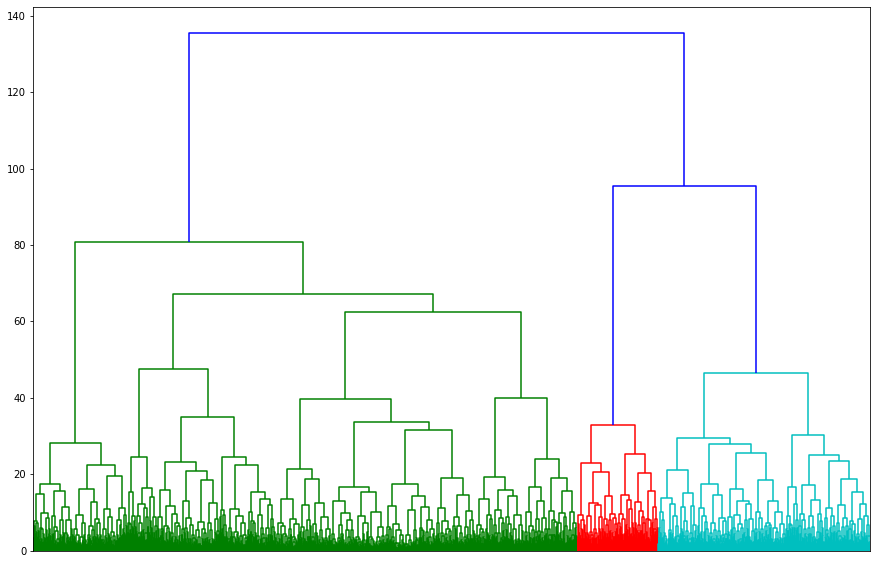

In [79]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top', no_labels=True)
plt.show()

Зададим модель на основании алгоритма K-means c числом кластеров n=5:

In [80]:
km = KMeans(n_clusters = 5, random_state=0)

Спрогнозируем кластеры для клиентов:

In [81]:
labels = km.fit_predict(x_sc)

Сохраним метки кластера в поле нашего датасета:

In [82]:
df['cluster_km'] = labels

Посмотрим на средние значения признаков по полученным кластерам:

In [83]:
df.groupby('cluster_km').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.502473,0.959446,0.783383,0.574679,1.000000,10.884273,0.543027,29.980218,160.706969,9.950544,4.738872,1.983305,1.976225,0.027695
1,0.560335,0.976105,0.356033,0.229391,0.998805,2.665472,0.473118,30.127838,161.724258,2.455197,4.896057,2.851531,2.849473,0.068100
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
4,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263


- В '0' кластере значительная часть сотрудников компаний-партнёров клуба (почти 80%), самые длинные абонементы (почти 11 мес в среднем), более 50% клиентов посещают групповые занятия, почти 96% клиентов проживают или работают в районе фитнес-центра
- В '4' кластере 97% проживают или работают в районе фитрес-центра, 47% посещают групповые занятия, самая крупная средняя выручка от доп услуг центра по сравнению с клиентами из др кластеров (162), ср. длительность с момента первого посещения центра наибольшая (4,9 мес), частота посещений в неделю самая высокая (2,8 в ср)
- Во '2' кластере мало клиентов посещают групповые занятия (22%), мало кто их них пришел по акции 'приведи друга' (8%) 
- В '3' кластере наименьшее кол-во клиентов сотрудников компаний-партнёров клуба (35%), наименьшая длительность текущего действующего абонемента (1,9 в ср), наименьшая суммарная выручка от доп услуг центра

Посмотрим на распределения признаков для кластеров:

In [84]:
X_2 = df.drop('churn', axis = 1)

In [85]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {return false;}

<IPython.core.display.Javascript object>

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


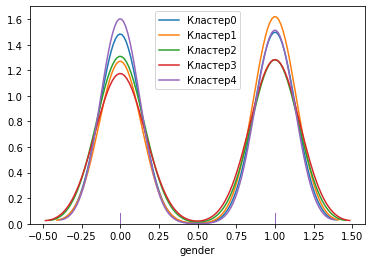

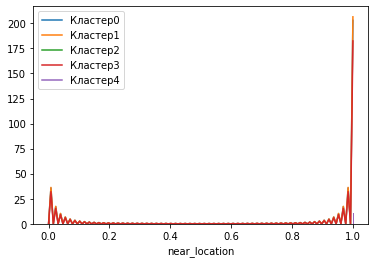

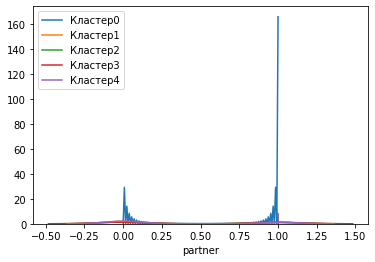

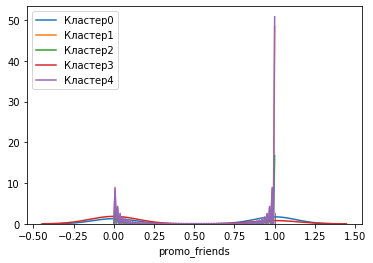

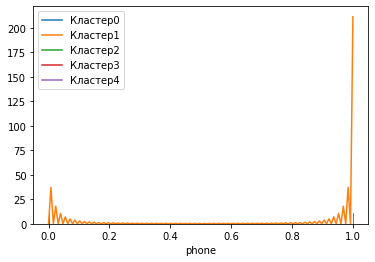

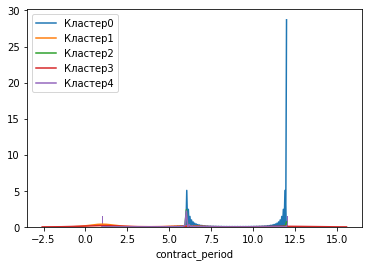

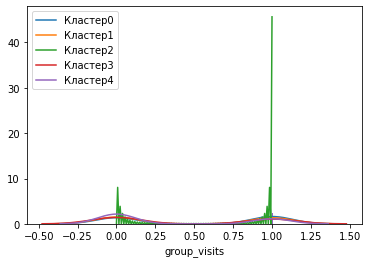

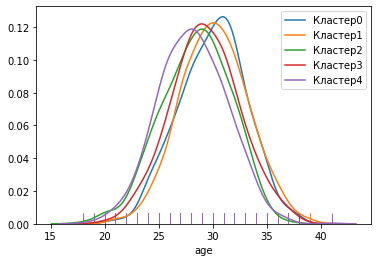

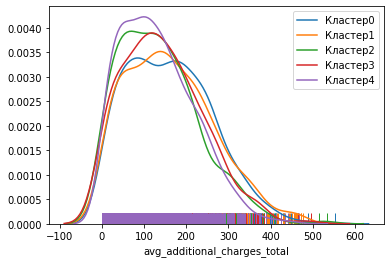

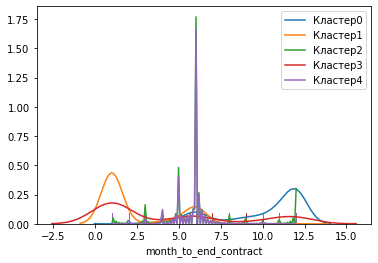

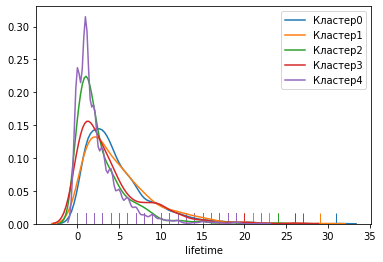

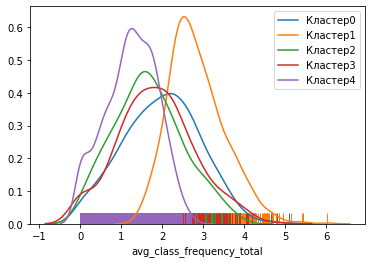

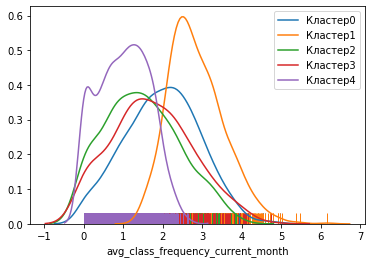

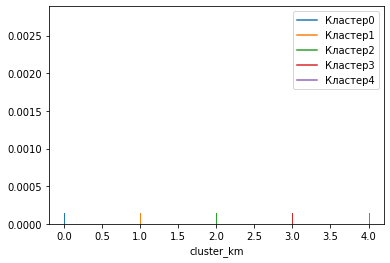

In [86]:
for feature in X_1:
    plt.figure()
    for i in range(0,5):
        sns.distplot(X_2.query('cluster_km == @i')[feature],
                    hist=False,
                    rug=True,
                    kde_kws={'label':'Кластер'+ str(i)},
                    )
plt.show()

- В кластерах '0' и '4' наиболее старшие люди по возрасту (в основном ~30 лет)
- Во '2' и '3' кластере в оновном клиенты с самым коротким Lifetime и самой маленькой частотой посещений в неделю и в основном это самые молодые по возрасту

Посмотрим, какие кластеры склонны к оттоку, а какие — надёжны:

In [87]:
df.pivot_table(index=['cluster_km'],
    values=('churn'),
    aggfunc='mean')

,churn
cluster_km,
0,0.027695
1,0.068100
2,0.443564
3,0.267532
4,0.514263


- Кластер '3' - самый наиболее склонный к оттоку (51% доля оттока)
- Кластер '2' - тоже склонен к оттоку (44%)
- Кластер '1' - менее склонен, чем предыдущие (27%)
- Кластер '4' - почти не склонен (7%)
- Кластер '0' - самый надёжный (3%)

### Вывод

## Общий вывод

Самые надёжные клиенты фитнес-центра: близко живут или работают, посещают групповые занятия, покупают абонементы на большой срок, среди них много сотрудников компаний-партнёров и довольно часто они впервые приходят по акции "приведи друга". Склонные к оттоку клиенты: более молодые, покупают абонементы на короткий срок, среди них очень мало сотрудников компаний-партнёров и пришедших по акции "приведи друга" и они реже посещают занятия. 

<p>Рекомендации по повышению качества работы с клиентами:

    - Запустить акцию "рассрочка" в целях стимулирования клиентов приобрести абонемент на бОльший срок
    - Предоставлять новым клиентам скидку на абонементы, длительностью более 1 месяца
    - Предоставлять скидки в течение первого месяца на услуги фитнес-центра новым клиентам
    - Осуществлять 2 раза в месяц email/sms рассылки с напоминанием о действующих акциях